------
<h1>
    <center>
        Centroid Data Augmentation<br><br>Ibadan & Kano<br>
    </center>
</h1>

------


## Imports of Required Packages and Setup

### Import Python packages

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


### Import of customized modules

In [3]:
# Add local module to the path
src = os.path.abspath('../scripts')
if src not in sys.path:
    sys.path.append(src)
    # sys.path.insert(0, src)


In [4]:
### Import functions
import utils as s2u
import spectral_indix_tools as spt
from mkdir import check_create_dir


## Load and Explore the Data

### Ibadan LGA and EA Polygons

In [5]:
fname = "../archive/inputs/NGA/kano_ibadan_shape_files/Ibadan_metro_fiveLGAshapes/Ibadan_metro_fiveLGAshapes.shp"
ib_LGAs = gpd.read_file(fname)

fname = "../archive/inputs/NGA/kano_ibadan_shape_files/Ibadan_metro_ward_fiveLGAs/Ibadan_metro_fiveLGAs.shp"
ib_Wards = gpd.read_file(fname)


In [6]:
ib_LGAs.head(3)   


LGACode            LGAName StateCode     Source   Timestamp  \
0   31006       Ibadan North        OY  eHA_Polio  2019-08-09   
1   31007  Ibadan North East        OY        WHO  2019-08-09   
2   31008  Ibadan North West        OY        WHO  2019-08-09   

                               GlobalID     AMAPCODE  \
0  fb782fd3-1a49-4bfa-9a64-c9561cc1c0bc  NIE OYS BDJ   
1  60dae0a9-7b69-47e9-9024-1e425fb61499  NIE OYS AGG   
2  818501be-e639-4414-b2df-ca32662cde7b  NIE OYS NRK   

                                            geometry  
0  POLYGON ((3.89913 7.37960, 3.89888 7.37942, 3....  
1  POLYGON ((3.92804 7.39108, 3.92817 7.39105, 3....  
2  POLYGON ((3.89160 7.37727, 3.89155 7.37730, 3....

In [7]:
# Plot training data in an interactive map
# field = "LGAName"
# axm = ib_LGAs.explore(column=field, categorical=True, legend=True, tiles="OpenStreetMap Mapnik")
# axm


In [8]:
ib_Wards.head(3)


StateCode  WardCode WardName LGACode Urban Source   Timestamp  \
0        OY  OYSINE01    Agugu   31007   Yes   INEC  2019-03-16   
1        OY  OYSINE02  Alafara   31007   Yes   INEC  2019-03-16   
2        OY  OYSINE11  Oke Adu   31007   Yes   INEC  2019-03-16   

                               GlobalID     AMAPCODE  \
0  0c68a884-f471-48da-8843-0be263586f01  NIE OYS AGG   
1  fa5a252f-028e-4685-ae31-fb8859db8512  NIE OYS AGG   
2  d2d736a9-691b-44a7-b382-29756ee5f9d4  NIE OYS AGG   

                                            geometry  
0  POLYGON ((3.91744 7.38072, 3.91755 7.38068, 3....  
1  POLYGON ((3.90645 7.38073, 3.90619 7.38071, 3....  
2  POLYGON ((3.90994 7.38446, 3.90986 7.38450, 3....

In [9]:

# ib_Wards.explore(column="WardName", categorical=True, legend=False, tiles="OpenStreetMap Mapnik")


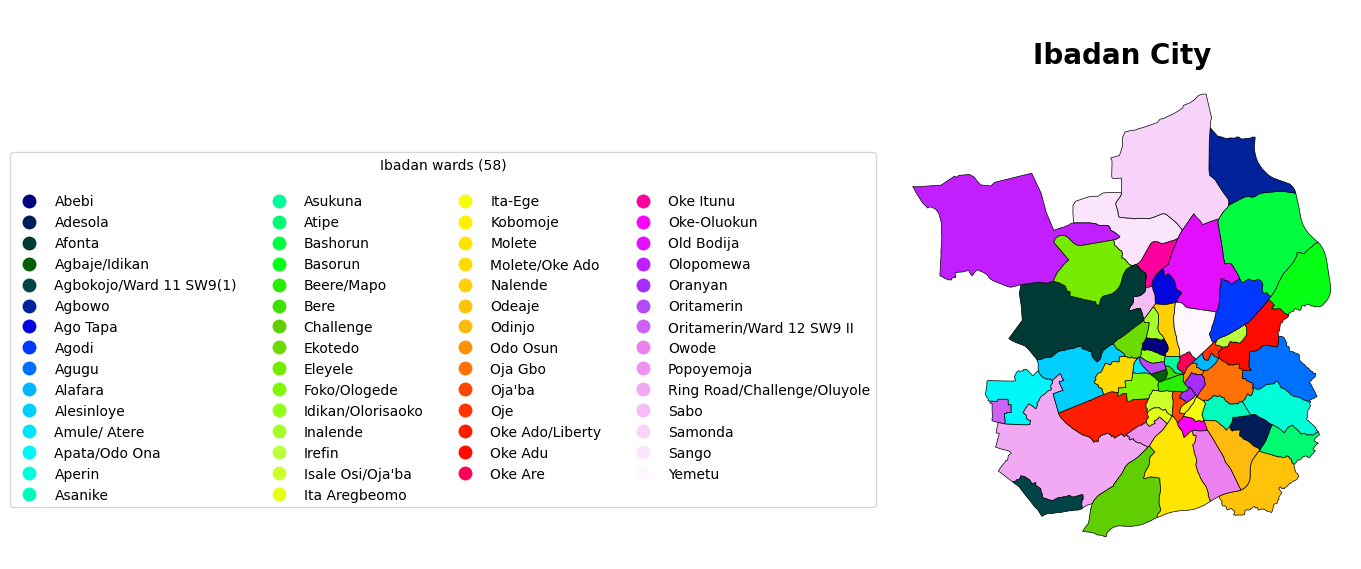

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
ib_Wards.plot(ax=ax, column="WardName", legend=True,
             legend_kwds={'bbox_to_anchor': (-0.02, 0.85),
                          "ncol": 4,
                          "title": f"Ibadan wards ({ib_Wards.WardName.unique().size})\n",},
             cmap="gist_ncar", edgecolor="k", linewidth=0.5)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax.spines[edge].set_visible(False)
ax.set_title("\nIbadan City", fontdict={"size": 20, "weight": "bold"})

fig.tight_layout();


In [11]:
# , marker_type="marker"


### Kano LGA and EA Polygons

In [12]:
### input file path
path = "../archive/inputs/NGA/kano_ibadan_shape_files/Kano_metro_sixLGA_shapes/Kano_metro_sixLGA_shapes.shp"

### Load input data shapefile
kano_LGAs = gpd.read_file(path)

### Plot first three rows
kano_LGAs.head()


LGACode    LGAName StateCode     Source   Timestamp  \
0   20001    Tarauni        KN  eHA_Polio  2019-08-09   
1   20012      Gwale        KN  eHA_Polio  2019-08-09   
2   20024       Dala        KN  eHA_Polio  2019-08-09   
3   20030      Fagge        KN  eHA_Polio  2019-08-09   
4   20037  Nassarawa        KN  eHA_Polio  2019-08-09   

                               GlobalID     AMAPCODE  \
0  7674a7b6-2666-4106-a1cb-d4eb2ef12e10  NIE KNS TRN   
1  7be3de80-8da4-426c-a31e-6461db188022  NIE KNS GWL   
2  fd91f49c-141d-4f2f-9a2c-3f5afb13fbe2  NIE KNS DAL   
3  693440ea-aed3-49df-b33b-7db55e74ea67  NIE KNS FGE   
4  9d51bc95-017a-4276-91f0-a34adc237f64  NIE KNS NSR   

                                            geometry  
0  POLYGON ((8.56568 11.94601, 8.56566 11.94590, ...  
1  POLYGON ((8.49599 11.97974, 8.49601 11.97930, ...  
2  POLYGON ((8.50724 11.99980, 8.50692 11.99938, ...  
3  POLYGON ((8.54172 12.00468, 8.54239 12.00457, ...  
4  POLYGON ((8.56559 11.97650, 8.56546 11.97696, ...

In [13]:
# kano_LGAs.explore(column="LGAName", legend=True)


In [14]:
### input file path
path = "../archive/inputs/NGA/kano_ibadan_shape_files/Kano_metro_ward_sixLGAs/Kano_metro_ward_sixLGAs.shp"

### Load input data shapefile
kano_Wards = gpd.read_file(path)

### Plot first five rows
kano_Wards.head()


StateCode WardCode    WardName LGACode Urban Source   Timestamp  \
0        KN   KN3103      Gawuna   20037    No   INEC  2019-03-16   
1        KN   KN3109      Kawaji   20037   Yes   INEC  2019-03-16   
2        KN   KN3108  Kaura Goje   20037   Yes   INEC  2019-03-16   
3        KN   KN3102        Gama   20037   Yes   INEC  2019-03-16   
4        KN   KN3104     Giginyu   20037   Yes   INEC  2019-03-16   

                               GlobalID         AMAPCODE  \
0  9146ae2b-d2d7-4141-ae96-125877e3d0bc  NIE KNS NSR GAW   
1  421ca7ff-9ecc-4a98-838a-3cdffb33fda4  NIE KNS NSR KAW   
2  77eeba60-94f1-4266-b945-cc74e86aa70f  NIE KNS NSR KAG   
3  aeebfec2-9400-4cc2-a946-4e693bdc294c  NIE KNS NSR GAM   
4  cbc390f5-3619-4f75-9043-1fe73bf1afd5  NIE KNS NSR GIG   

                                            geometry  
0  POLYGON ((8.54457 12.02027, 8.54458 12.02125, ...  
1  POLYGON ((8.56026 12.01194, 8.56044 12.01201, ...  
2  POLYGON ((8.54650 12.03483, 8.54610 12.03483, ...  
3  POLYGON ((8.54650 12.03483, 8.54727 12.03497, ...  
4  POLYGON ((8.57562 11.97560, 8.57436 11.97605, ...

In [15]:
# kano_EAs.explore(column="WardName", legend=False)


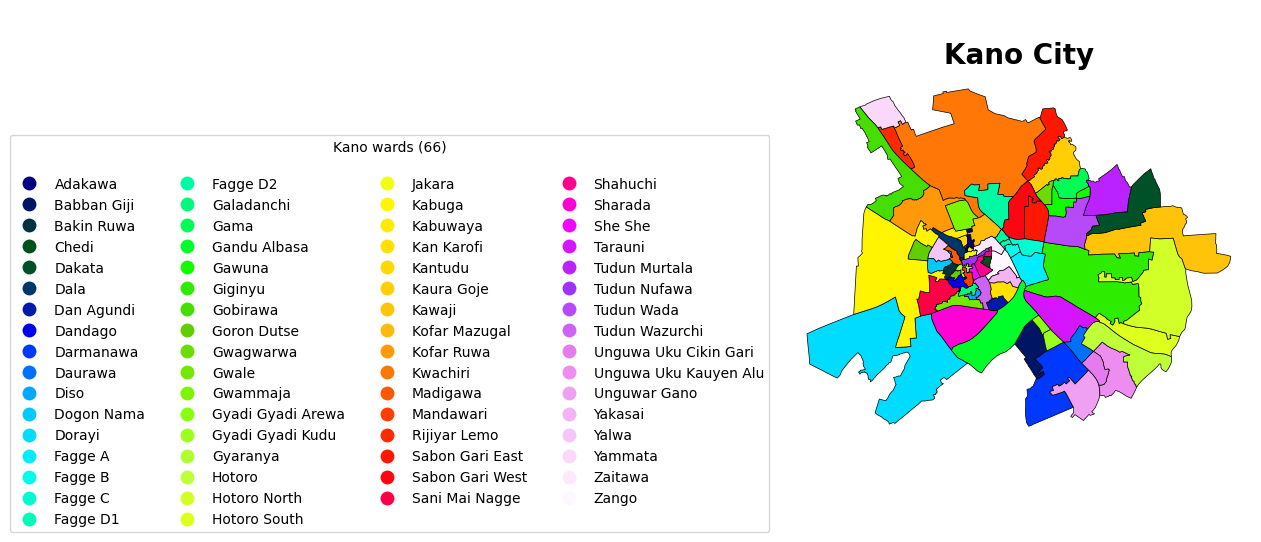

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
kano_Wards.plot(ax=ax, column="WardName", legend=True,
             legend_kwds={'bbox_to_anchor': (-0.02, 0.85),
                          "ncol": 4,
                          "title": f"Kano wards ({kano_Wards.WardName.unique().size})\n",},
             cmap="gist_ncar", edgecolor="k", linewidth=0.5)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax.spines[edge].set_visible(False)
ax.set_title("\nKano City", fontdict={"size": 20, "weight": "bold"})

fig.tight_layout();


### LGA and Ward levels

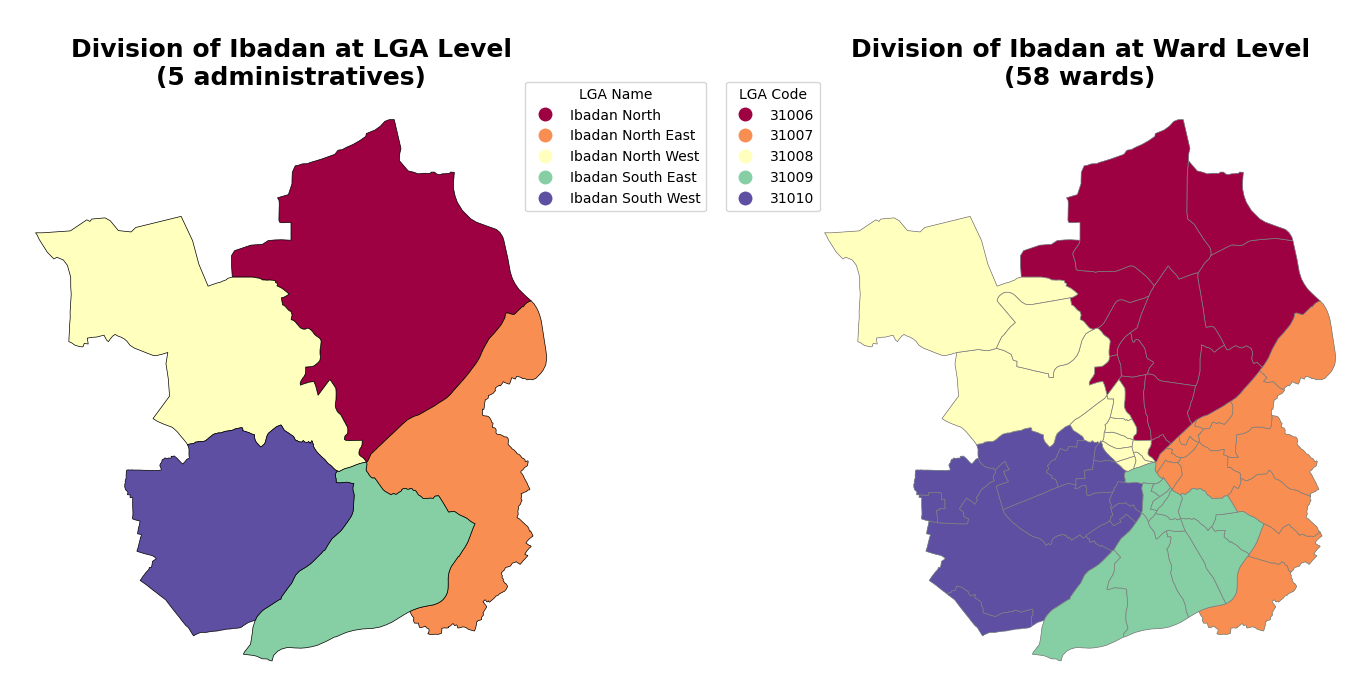

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ib_LGAs.plot(ax=ax[0], column="LGAName", cmap="Spectral",
                   legend=True, legend_kwds={'bbox_to_anchor': (1.25, 1.03), "title": "LGA Name"},
                   edgecolor="k", linewidth=0.5)
ib_Wards.plot(ax=ib_LGAs.plot(ax=ax[1], column="LGAName", legend=False),
                   column="LGACode", cmap="Spectral", legend=True,
                   legend_kwds={'bbox_to_anchor': (.05, 1.03), "title": "LGA Code"}, 
                   edgecolor="gray", linewidth=0.5)
###
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
###
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax[0].spines[edge].set_visible(False)
    ax[1].spines[edge].set_visible(False)


ax[0].set_title(f"\nDivision of Ibadan at LGA Level\n({ib_LGAs.LGAName.unique().size} administratives)", fontdict={"size": 18, "weight": "bold"})
ax[1].set_title(f"\nDivision of Ibadan at Ward Level\n({ib_Wards.WardName.unique().size} wards)", fontdict={"size": 18, "weight": "bold"})
fig.tight_layout();


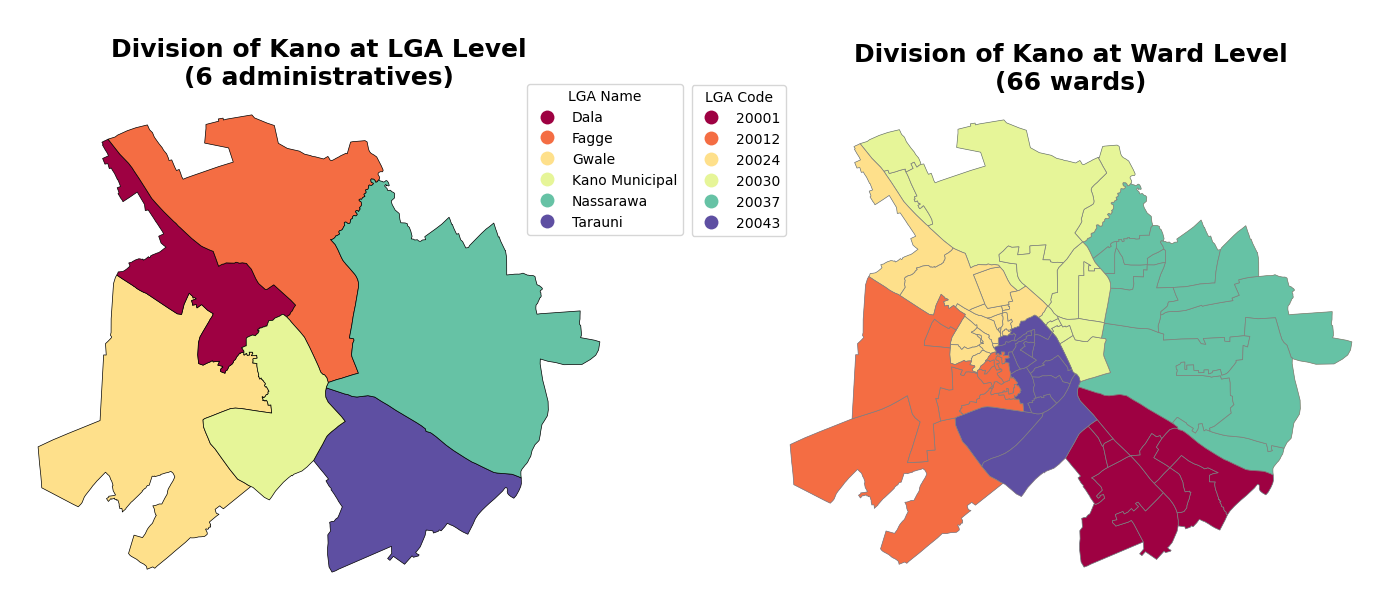

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

kano_LGAs.plot(ax=ax[0], column="LGAName", cmap="Spectral",
                   legend=True, legend_kwds={'bbox_to_anchor': (1.1, 1.03), "title": "LGA Name"},
                   edgecolor="k", linewidth=0.5)
kano_Wards.plot(ax=kano_LGAs.plot(ax=ax[1], column="LGAName", legend=False),
                   column="LGACode", cmap="Spectral", legend=True,
                   legend_kwds={'bbox_to_anchor': (.05, 1.04), "title": "LGA Code"}, 
                   edgecolor="gray", linewidth=0.5)
###
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
###
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax[0].spines[edge].set_visible(False)
    ax[1].spines[edge].set_visible(False)


ax[0].set_title(f"\nDivision of Kano at LGA Level\n({kano_LGAs.LGAName.unique().size} administratives)", fontdict={"size": 18, "weight": "bold"})
ax[1].set_title(f"\nDivision of Kano at Ward Level\n({kano_Wards.WardName.unique().size} wards)", fontdict={"size": 18, "weight": "bold"})
fig.tight_layout();


## Ibadan EA Classification

In [19]:
filename = "../data-in/Ibadan_centoids_data.csv"
ib_EAs = pd.read_csv(filename, index_col=0)
ib_EAs.head()


settlement_type_new   Ward ea_numbers_new  longitude  latitude
1            Informal  AGUGU  AGUGU_001/012   3.919233  7.385282
2            Informal  AGUGU  AGUGU_003/022   3.920601  7.383531
3            Informal  AGUGU  AGUGU_004/035   3.926174  7.379370
4            Informal  AGUGU  AGUGU_005/032   3.920879  7.391955
5            Informal  AGUGU  AGUGU_009/014   3.922697  7.379974

In [20]:
ib_EAs.Ward.unique()


array(['AGUGU', 'BASHORUN', 'CHALLENGE', 'OLOGUNERU'], dtype=object)

### Make geometry `POINT(x, y)` to ease the visualization

In [21]:
points = [Point(x, y) for x, y in zip(ib_EAs["longitude"], ib_EAs["latitude"])]
geo_ib_EAs = gpd.GeoDataFrame(ib_EAs.rename(columns={"settlement_type_new": "lc",
                                                     "ea_numbers_new": "EA_number",
                                                     "latitude":"lat", "longitude": "lon"}),
                              geometry=points, crs="EPSG:4326")

###
geo_ib_EAs.head()


lc   Ward      EA_number       lon       lat                 geometry
1  Informal  AGUGU  AGUGU_001/012  3.919233  7.385282  POINT (3.91923 7.38528)
2  Informal  AGUGU  AGUGU_003/022  3.920601  7.383531  POINT (3.92060 7.38353)
3  Informal  AGUGU  AGUGU_004/035  3.926174  7.379370  POINT (3.92617 7.37937)
4  Informal  AGUGU  AGUGU_005/032  3.920879  7.391955  POINT (3.92088 7.39195)
5  Informal  AGUGU  AGUGU_009/014  3.922697  7.379974  POINT (3.92270 7.37997)

In [22]:
for i, row in geo_ib_EAs.head(1).iterrows():
    # print(i)
    print(row)


lc                                            Informal
Ward                                             AGUGU
EA_number                                AGUGU_001/012
lon                                           3.919233
lat                                           7.385282
geometry     POINT (3.91923272544479 7.38528184707015)
Name: 1, dtype: object


In [23]:
pd.Series(row.to_dict())


lc                                            Informal
Ward                                             AGUGU
EA_number                                AGUGU_001/012
lon                                           3.919233
lat                                           7.385282
geometry     POINT (3.91923272544479 7.38528184707015)
dtype: object

In [24]:
dd = row.to_dict()
dd


{'lc': 'Informal',
 'Ward': 'AGUGU',
 'EA_number': 'AGUGU_001/012',
 'lon': 3.91923272544479,
 'lat': 7.38528184707015,
 'geometry': <POINT (3.919 7.385)>}

In [25]:
dd.update({"lon": 3.92, "lat": 7.39})
dd


{'lc': 'Informal',
 'Ward': 'AGUGU',
 'EA_number': 'AGUGU_001/012',
 'lon': 3.92,
 'lat': 7.39,
 'geometry': <POINT (3.919 7.385)>}

In [26]:
m = ib_Wards.explore(column="WardName", legend=False, tiles="OpenStreetMap Mapnik")
geo_ib_EAs.rename(columns={"lc": "Settlement Type"}).explore(m=m, column="Settlement Type",
                                                     categorical=True, legend=True, marker_size=1)


In [27]:
### Get rid of the outliers
geo_df = geo_ib_EAs.sort_values("lat").iloc[:-2, :]


In [28]:
m = ib_Wards.explore(column="WardName", legend=False)
geo_df.rename(columns={"lc": "Settlement Type"}).explore(m=m, column="Settlement Type", # marker_type="marker", marker_size=1,
                                                     categorical=True, legend=True, height=200, width=200)


## Generate Samples within Centroid Neighbourhood

### Working with latitude (lat) / longitude (lon) and distance

The approximate conversions are:
- Latitude: `1° = 110574 m`
- Longitude: `1° = 111320 * cos(latitude) m`

**Remarks:**
- `cos(0°) = 1`, therefore, there is no correction factor applied doing the calculation at the equator because latitude equals to `0°`. The longitudes are the widest there.
- `cos(90°) = 0`, At the poles the longitudes meet in one point. There is no distance to be calculated.

```Python
for _, row in geo_ib_EAs.head(3).iterrows():
        # Extract longitude and latitude
        cent_lon = row.loc["lon"]
        cent_lat = row.loc["lat"]
        
        row.update({"lon": 3.92, "lat": 7.39})
```


In [29]:
geo_df.head()


lc       Ward          EA_number       lon       lat  \
86    Formal  CHALLENGE  CHALLENGE_041/013  3.885773  7.335068   
66  Informal  CHALLENGE  CHALLENGE_011/029  3.874462  7.336565   
91  Informal  CHALLENGE  CHALLENGE_044/031  3.891438  7.337091   
84  Informal  CHALLENGE  CHALLENGE_039/007  3.887648  7.337195   
63  Informal  CHALLENGE  CHALLENGE_006/009  3.873034  7.337766   

                   geometry  
86  POINT (3.88577 7.33507)  
66  POINT (3.87446 7.33656)  
91  POINT (3.89144 7.33709)  
84  POINT (3.88765 7.33720)  
63  POINT (3.87303 7.33777)

### Helper and custom functions

In [30]:
#### Import of additional packages
import random
import math
from shapely.geometry import Point, Polygon, MultiPoint
from typing import List, Tuple


In [31]:
def create_box_around_centroid(centroid_lon:float,
                               centroid_lat:float,
                               box_width:float,
                               box_height:float):
    """
    Generate new data points neighbouring the given EA with the simalar
    classification. The EA neighbourhood within which points are generated
    is a rectangle centered around the given EA location.

    Args:
        centroid_lon (float): Longitude of the centroid
        centroid_lat (float): Latitude of the centroid
        box_width (float): Width of the desired box
        box_height (float): Height of the desired box

    Returns:
        List of the bounding box coordinates and a list of tuples containing
        the the bounding box vertices (lon, lon) in counterclockwise direction.
    """
    # Convert meters to degrees (approximate)
    meters_to_degrees_lon = (111320 * math.cos(centroid_lat * math.pi / 180))
    meters_to_degrees_lat = 110574
    
    # Calculate the coordinates of the rectangle corners
    min_lon = centroid_lon - (box_width / (2 * meters_to_degrees_lon))
    max_lon = centroid_lon + (box_width / (2 * meters_to_degrees_lon))
    min_lat = centroid_lat - (box_height / (2 * meters_to_degrees_lat))
    max_lat = centroid_lat + (box_height / (2 * meters_to_degrees_lat))
    
    # Define the list of coordinates of endpoints of interest
    endpoint_coordinates = [(min_lon, min_lat), (max_lon, max_lat)]
    
    # Define the rectangle coordinates in counterclockwise direction
    rectangle_coordinates = [(min_lon, min_lat),
                             (min_lon, max_lat),
                             (max_lon, max_lat),
                             (max_lon, min_lat),
                             (min_lon, min_lat)  # Closing the loop
                             ]
    
    return endpoint_coordinates, rectangle_coordinates


In [32]:
# Example of usage
centroid_lon, centroid_lat = 3.88577, 7.33507
box_width, box_heigth = 50, 50 # In meter

endpoint_coordinates, box_coordinates = create_box_around_centroid(centroid_lon, centroid_lat, box_width, box_heigth)

# Print the generated points
print(f"Min (lon, lat) values of the rectangular box: {endpoint_coordinates[0]}")
print(f"Max (lon, lat) values of the rectangular box: {endpoint_coordinates[1]}")

print(f"\nCoordinate (lon, lat) values of the rectangular box in counterclockwise direction:")
for i, point in enumerate(box_coordinates):
    print(f"{i}: {point}")


Min (lon, lat) values of the rectangular box: (3.885543569205817, 7.334843907066761)
Max (lon, lat) values of the rectangular box: (3.885996430794183, 7.335296092933239)

Coordinate (lon, lat) values of the rectangular box in counterclockwise direction:
0: (3.885543569205817, 7.334843907066761)
1: (3.885543569205817, 7.335296092933239)
2: (3.885996430794183, 7.335296092933239)
3: (3.885996430794183, 7.334843907066761)
4: (3.885543569205817, 7.334843907066761)


In [33]:
def sample_random_points_in_retangle(min_lon:float,
                                     min_lat:float,
                                     max_lon:float,
                                     max_lat:float,
                                     sample_size:int):
    """
    Generate n random points within a rectangular box defined by (min_lon, min_lat) and (max_lon, max_lat).

    Args:
        min_lon (float): Minimum longitude of the rectangle.
        min_lat (float): Minimum latitude of the rectangle.
        max_lon (float): Maximum longitude of the rectangle.
        max_lat (float): Maximum latitude of the rectangle.
        sample_size (int): Number of random points to sample.

    Returns:
        List[Tuple[float, float]]: List of tuples containing the random (lon, lat) points.
    """
    points = []
    
    for _ in range(sample_size):
        lon = random.uniform(min_lon, max_lon)
        lat = random.uniform(min_lat, max_lat)
        points.append((lon, lat))
    
    return points


In [34]:
# Example of usage
min_lon, min_lat = 3.88577, 7.33507
max_lon, max_lat = 3.87446, 7.33656
sample_size = 10

random_points = sample_random_points_in_retangle(min_lon, min_lat, max_lon, max_lat, sample_size)

# Print the generated points
for i, point in enumerate(random_points):
    print(f"Point {i+1}: {point} ---> ({point[0]:.4f}, {point[1]:.4f})")


Point 1: (3.8815339103042152, 7.336403829355279) ---> (3.8815, 7.3364)
Point 2: (3.8770384795841433, 7.335466770409794) ---> (3.8770, 7.3355)
Point 3: (3.8774781289166618, 7.335739998903013) ---> (3.8775, 7.3357)
Point 4: (3.8790616803926152, 7.335513618687367) ---> (3.8791, 7.3355)
Point 5: (3.8750383632461665, 7.335078256684996) ---> (3.8750, 7.3351)
Point 6: (3.8785367218087665, 7.336348511948997) ---> (3.8785, 7.3363)
Point 7: (3.885694307535397, 7.335573642533511) ---> (3.8857, 7.3356)
Point 8: (3.882081696273096, 7.3363303562012145) ---> (3.8821, 7.3363)
Point 9: (3.8831343108719847, 7.336505538126552) ---> (3.8831, 7.3365)
Point 10: (3.8795693557765283, 7.3351048776987735) ---> (3.8796, 7.3351)


In [35]:
def sample_random_points_in_polygon(polygon_vertices: List[Tuple[float, float]], sample_size):
    """
    Generate n random points within a polygon defined by its vertices.

    Args:
        polygon_vertices (List[Tuple[float, float]]): List of (lon, lat) tuples defining the polygon vertices.
        sample_size (int): Number of random points to sample.

    Returns:
        List[Tuple[float, float]]: List of tuples containing the random (lon, latitude) points.
    """
    # Create the polygon
    # polygon = Polygon(polygon_vertices)
    polygon = MultiPoint(polygon_vertices).convex_hull
    
    # Get the bounding box of the polygon
    min_lon, min_lat, max_lon, max_lat = polygon.bounds
    
    random_points = []
    geo_points = []
    while len(random_points) < sample_size:
        # Generate a random point within the bounding box
        lon = random.uniform(min_lon, max_lon)
        lat = random.uniform(min_lat, max_lat)
        point = Point(lon, lat)
        
        # Check if the point is within the polygon
        if polygon.contains(point):
            random_points.append((lon, lat))
            geo_points.append(point)
    
    return random_points, gpd.GeoSeries(geo_points, crs="EPSG:4326"), gpd.GeoSeries(polygon, crs="EPSG:4326")


Point 1: (3.9196072895370957, 7.385063942768786) ---> (3.9196, 7.3851)
Point 2: (3.9240657043249243, 7.387489877838049) ---> (3.9241, 7.3875)
Point 3: (3.922856324706297, 7.38666592557648) ---> (3.9229, 7.3867)
Point 4: (3.9236351714678204, 7.382451499869506) ---> (3.9236, 7.3825)
Point 5: (3.9257092711494317, 7.384654030824509) ---> (3.9257, 7.3847)
Point 6: (3.926203703182347, 7.380962088114813) ---> (3.9262, 7.3810)
Point 7: (3.9229214346677965, 7.384152809092923) ---> (3.9229, 7.3842)
Point 8: (3.9252285555279682, 7.3798944432771885) ---> (3.9252, 7.3799)
Point 9: (3.9205072113090265, 7.3837033585940395) ---> (3.9205, 7.3837)
Point 10: (3.927989089833383, 7.3856161830821705) ---> (3.9280, 7.3856)
Point 11: (3.9188571265193897, 7.38992441620838) ---> (3.9189, 7.3899)
Point 12: (3.9287347872659213, 7.381921162346199) ---> (3.9287, 7.3819)
Point 13: (3.928727389973103, 7.379579393442992) ---> (3.9287, 7.3796)
Point 14: (3.9215842628977584, 7.384336032065037) ---> (3.9216, 7.3843)
Poin

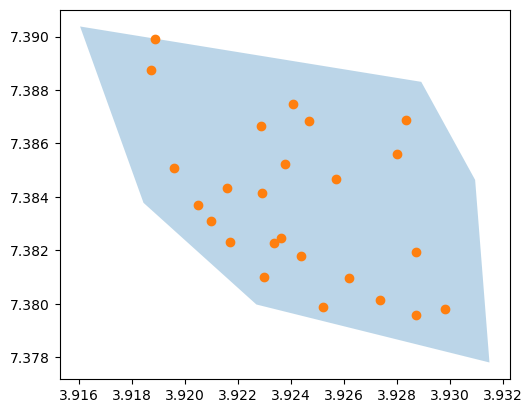

In [36]:
# Example of usage 1
rdf = geo_df[geo_df.Ward == "AGUGU"].sample(n=10)
polygon_vertices = rdf.geometry.apply(lambda p: list(p.coords)[0]).tolist()
sample_size = 25

random_points, geo_points, rdf_polygon = sample_random_points_in_polygon(polygon_vertices, sample_size)

# Print the generated points
for i, point in enumerate(random_points):
    print(f"Point {i+1}: {point} ---> ({point[0]:.4f}, {point[1]:.4f})")
    
# Plotting the original Point and the newly-generated Polygons
ax = rdf_polygon.plot(alpha=.3)
geo_points.plot(ax = ax, c='tab:orange');


Point 1: (3.932011478539801, 7.3846868310232106) ---> (3.9320, 7.3847)
Point 2: (3.9271303229732917, 7.386800744325826) ---> (3.9271, 7.3868)
Point 3: (3.934558736313391, 7.37456061047728) ---> (3.9346, 7.3746)
Point 4: (3.933388039817488, 7.373064574433785) ---> (3.9334, 7.3731)
Point 5: (3.931066091881714, 7.380828504571093) ---> (3.9311, 7.3808)
Point 6: (3.929764302897244, 7.383225564297143) ---> (3.9298, 7.3832)
Point 7: (3.926946501872627, 7.389970698764087) ---> (3.9269, 7.3900)
Point 8: (3.9317504807415133, 7.387123996531195) ---> (3.9318, 7.3871)
Point 9: (3.936926128650286, 7.378769382560992) ---> (3.9369, 7.3788)
Point 10: (3.930568560168456, 7.382187502974387) ---> (3.9306, 7.3822)
Point 11: (3.9277076325649234, 7.376169008061993) ---> (3.9277, 7.3762)
Point 12: (3.9315126181271656, 7.379846556283803) ---> (3.9315, 7.3798)
Point 13: (3.9306189536486675, 7.375136803899199) ---> (3.9306, 7.3751)
Point 14: (3.9326988773972062, 7.383186546086567) ---> (3.9327, 7.3832)
Point 15:

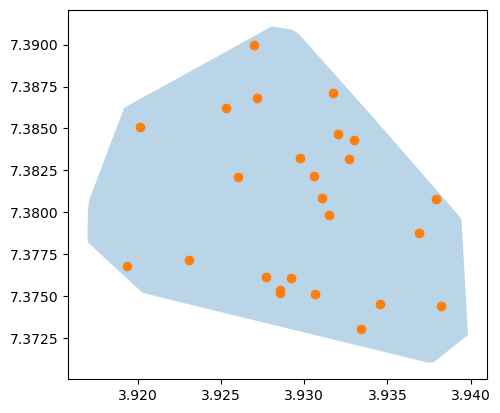

In [37]:
# Example of usage 2
rdf = ib_Wards[ib_Wards.WardName == "Agugu"]
polygon_vertices = list(rdf.geometry[0].exterior.coords)
sample_size = 25

random_points, geo_points, rdf_polygon = sample_random_points_in_polygon(polygon_vertices, sample_size)

# Print the generated points
for i, point in enumerate(random_points):
    print(f"Point {i+1}: {point} ---> ({point[0]:.4f}, {point[1]:.4f})")
    
# Plotting the original Point and the newly-generated Polygons
ax = rdf_polygon.plot(alpha=.3)
geo_points.plot(ax = ax, c='tab:orange');


In [38]:
m = rdf_polygon.explore(alpha=.1)
geo_points.explore(m=m, marker_type="marker", marker_size=.1,)


<Axes: >

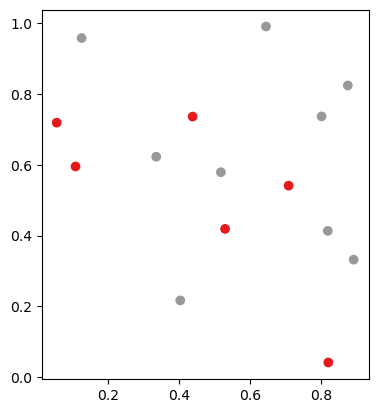

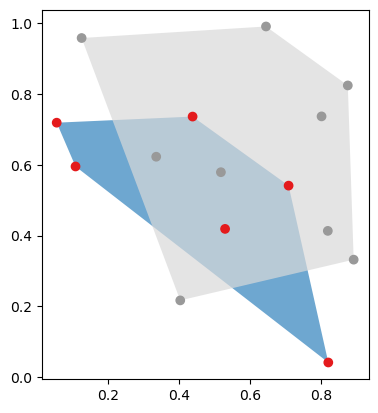

In [39]:
# Importing libraries used
import numpy as np
import geopandas as gpd
import shapely
from shapely.wkt import loads

# Setting the random seed
np.random.seed(6)

# Determining the number of points in the example
npoints = 15

# Generating the GeoDataFrame with random Points
mydf = gpd.GeoDataFrame({'id':range(npoints),
                         'geometry':(pd.Series(list(np.random.rand(npoints,2)))
                                     .apply(shapely.geometry.Point)),
                         'group':np.random.randint(1,3,npoints)})

# Plotting the GeoDataFrame according to the "group" column
mydf.plot(column='group', cmap='Set1')

# Fusing all of the Points based on the "group" column and 
# generating a Polygon that envelops all of the Points in
# each group
new_df = (mydf.dissolve(by='group')
          .convex_hull
          .reset_index())

# Plotting the original Point and the newly-generated Polygons
ax = new_df.plot(column='group',cmap='tab20c', alpha=.7)
mydf.plot(ax = ax, column='group', cmap='Set1')


## Explore the Calculation of a Ceantroid Distance to the Nearest Roada 

### Understanding the projections


```Python
# read in my points data
df = pd.read_csv(myfile)
geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
geo_df = geo_df.set_crs('EPSG:3857')

# read in the roads data
primary_roads = gpd.read_file(tl_2021_us_primaryroads.shp)
primary_roads = primary_roads.to_crs('EPSG:3857')

# define a buffer radius
radius = 1000

# get buffer around each point
geo_df['buffer'] = [point.buffer(radius) for point in geo_df['geometry']]
```

**UPDATE:** After some tinkering around, I got the accepted answer to work for me. I ended up using 'ESRI:102003' as my CRS, and this seems to work fine for my purposes. One thing that tripped me up for a bit was that I was setting my points crs to 102003 immediately after reading in the data, which was giving me the wrong coordinates. I needed to first set crs to 'EPSG:4269' and then convert to the other crs.

### First exploration attempt

In [40]:
points = geo_df.copy()
# points = points.to_crs("EPSG:4326")
points["pointid"] = np.arange(points.shape[0]) # Create an id column
points["pointgeometry"] = points["geometry"] # Save the point geometry
points["geometry"] = points.buffer(0.0005)
points.head()


/var/folders/3h/6bwdt7vj1ld4s9qybqc445br0000gn/T/ipykernel_76908/1488655305.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points["geometry"] = points.buffer(0.0005)


lc       Ward          EA_number       lon       lat  \
86    Formal  CHALLENGE  CHALLENGE_041/013  3.885773  7.335068   
66  Informal  CHALLENGE  CHALLENGE_011/029  3.874462  7.336565   
91  Informal  CHALLENGE  CHALLENGE_044/031  3.891438  7.337091   
84  Informal  CHALLENGE  CHALLENGE_039/007  3.887648  7.337195   
63  Informal  CHALLENGE  CHALLENGE_006/009  3.873034  7.337766   

                                             geometry  pointid  \
86  POLYGON ((3.88627 7.33507, 3.88627 7.33502, 3....        0   
66  POLYGON ((3.87496 7.33656, 3.87496 7.33652, 3....        1   
91  POLYGON ((3.89194 7.33709, 3.89194 7.33704, 3....        2   
84  POLYGON ((3.88815 7.33720, 3.88815 7.33715, 3....        3   
63  POLYGON ((3.87353 7.33777, 3.87353 7.33772, 3....        4   

              pointgeometry  
86  POINT (3.88577 7.33507)  
66  POINT (3.87446 7.33656)  
91  POINT (3.89144 7.33709)  
84  POINT (3.88765 7.33720)  
63  POINT (3.87303 7.33777)

In [41]:
m = ib_Wards.explore(column="WardName", legend=False)
points.rename(columns={"lc": "Settlement Type"}).explore(m=m, column="Settlement Type", # marker_type="marker", marker_size=1,
                                                     categorical=True, legend=True, height=200, width=200)


In [42]:
def calc_nearest_road_distance(roads, points):
    """_summary_

    Args:
        roads (_type_): _description_
        points (_type_): _description_
    """
    ### Organize data of interest 
    roads = roads.to_crs(32616)
    roads = roads.drop_duplicates(subset="geometry") # There might be some duplicate roads on top of each other, drop them.

    points = points.to_crs(32616)
    points["pointid"] = np.arange(points.shape[0]) # Create an id column
    points["pointgeometry"] = points["geometry"] # Save the point geometry
    points["geometry"] = points.buffer(1000)
    
    ### Intersect to clip all roads with each buffer and get all road attributes
    clipped = points.overlay(roads, how="intersection", keep_geom_type=False)

    closest = []
    for group, frame in clipped.groupby("pointid"): # For each pointid and all lines intersecting its buffer
        # Calculate the distances to all roads intersecting the point buffer
        frame["distance"] = frame["pointgeometry"].distance(frame["geometry"]) # That is why we saved the point geometry
        m = frame[frame["distance"]==frame["distance"].min()] # Find the road closest road
        closest.append(m) # m is a dataframe, append it to closest list

    closest = gpd.pd.concat(closest) # Create a dataframe from the list

    # There are a few points that are exactly the same distance two different roads, I drop them. I dont know what you want to do
    closest = closest.drop_duplicates(subset="pointid")

    # You can then join the result back to the points
    points = points.merge(right=closest[["pointid","LINEARID","distance"]], how="left", on="pointid")

    


In [43]:
### Load and organize data of interest 
roads = gpd.read_file(r"roads_filename.shp")
roads = roads.to_crs(32616)
roads = roads.drop_duplicates(subset="geometry") # There might be some duplicate roads on top of each other, drop them.

points = gpd.read_file(r"points_filename.shp")
points = points.to_crs(32616)
points["pointid"] = np.arange(points.shape[0]) # Create an id column
points["pointgeometry"] = points["geometry"] # Save the point geometry
points["geometry"] = points.buffer(10000)


DriverError: roads_filename.shp: No such file or directory

In [ ]:
### Intersect to clip all roads with each buffer and get all road attributes
clipped = points.overlay(roads, how="intersection", keep_geom_type=False)

closest = []
for group, frame in clipped.groupby("pointid"): # For each pointid and all lines intersecting its buffer
    # Calculate the distances to all roads intersecting the point buffer
    frame["distance"] = frame["pointgeometry"].distance(frame["geometry"]) # That is why we saved the point geometry
    m = frame[frame["distance"]==frame["distance"].min()] # Find the road closest road
    closest.append(m) # m is a dataframe, append it to closest list

closest = gpd.pd.concat(closest) # Create a dataframe from the list

# There are a few points that are exactly the same distance two different roads, I drop them. I dont know what you want to do
closest = closest.drop_duplicates(subset="pointid")

# You can then join the result back to the points
points = points.merge(right=closest[["pointid","LINEARID","distance"]], how="left", on="pointid")


In [44]:
import pandas as pd


In [49]:
### Read data at the household level
filename = "../../../inputs/Ibadan/ibadan_all_hseholds_cordinates.csv"
hsehold_ibadan = pd.read_csv(filename)


In [50]:
hsehold_ibadan.head()


Unnamed: 0  longitude  latitude  hh_serial_number       Ward  \
0           1   3.800193  7.397513             10658      AGUGU   
1           2   3.828867  7.434913             15849  OLOGUNERU   
2           3   3.828867  7.434913             15849  OLOGUNERU   
3           4   3.828867  7.434913             15849  OLOGUNERU   
4           5   3.828897  7.431145             15413  OLOGUNERU   

  settlement_type           ea_names  centroid_lon  centroid_lat  
0        Informal      AGUGU_026/003      3.915278      7.387086  
1          Formal  OLOGUNERU_002/018      3.831853      7.434109  
2          Formal  OLOGUNERU_002/020      3.831853      7.434109  
3          Formal  OLOGUNERU_002/031      3.834776      7.430973  
4          Formal  OLOGUNERU_022/005      3.844348      7.424298

In [51]:
hsehold_ibadan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2700 non-null   int64  
 1   longitude         2700 non-null   float64
 2   latitude          2700 non-null   float64
 3   hh_serial_number  2700 non-null   int64  
 4   Ward              2700 non-null   object 
 5   settlement_type   2700 non-null   object 
 6   ea_names          2700 non-null   object 
 7   centroid_lon      2700 non-null   float64
 8   centroid_lat      2700 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 190.0+ KB


In [52]:
hsehold_ibadan.ea_names.unique().size


127

In [53]:
points1 = [Point(x, y) for x, y in zip(hsehold_ibadan["longitude"], hsehold_ibadan["latitude"])]
points2 = [Point(x, y) for x, y in zip(hsehold_ibadan["centroid_lon"], hsehold_ibadan["centroid_lat"])]
geo_hsehold_ib1 = gpd.GeoDataFrame(hsehold_ibadan, geometry=points1, crs="EPSG:4326")
geo_hsehold_ib2 = gpd.GeoDataFrame(hsehold_ibadan, geometry=points2, crs="EPSG:4326")

###
geo_hsehold_ib2.head()


Unnamed: 0  longitude  latitude  hh_serial_number       Ward  \
0           1   3.800193  7.397513             10658      AGUGU   
1           2   3.828867  7.434913             15849  OLOGUNERU   
2           3   3.828867  7.434913             15849  OLOGUNERU   
3           4   3.828867  7.434913             15849  OLOGUNERU   
4           5   3.828897  7.431145             15413  OLOGUNERU   

  settlement_type           ea_names  centroid_lon  centroid_lat  \
0        Informal      AGUGU_026/003      3.915278      7.387086   
1          Formal  OLOGUNERU_002/018      3.831853      7.434109   
2          Formal  OLOGUNERU_002/020      3.831853      7.434109   
3          Formal  OLOGUNERU_002/031      3.834776      7.430973   
4          Formal  OLOGUNERU_022/005      3.844348      7.424298   

                  geometry  
0  POINT (3.91528 7.38709)  
1  POINT (3.83185 7.43411)  
2  POINT (3.83185 7.43411)  
3  POINT (3.83478 7.43097)  
4  POINT (3.84435 7.42430)

In [54]:
geo_hsehold_ib1.explore()


In [55]:
geo_hsehold_ib2.explore()


In [56]:
geo_hsehold_ib1


Unnamed: 0  longitude  latitude  hh_serial_number       Ward  \
0              1   3.800193  7.397513             10658      AGUGU   
1              2   3.828867  7.434913             15849  OLOGUNERU   
2              3   3.828867  7.434913             15849  OLOGUNERU   
3              4   3.828867  7.434913             15849  OLOGUNERU   
4              5   3.828897  7.431145             15413  OLOGUNERU   
...          ...        ...       ...               ...        ...   
2695        2696   3.950385  7.368912             11710      AGUGU   
2696        2697   3.950988  7.398383             11738      AGUGU   
2697        2698   3.974780  7.374317             10936      AGUGU   
2698        2699   3.992420  7.421558             12784   BASHORUN   
2699        2700   3.992955  7.338488             14329  CHALLENGE   

     settlement_type           ea_names  centroid_lon  centroid_lat  \
0           Informal      AGUGU_026/003      3.915278      7.387086   
1             Formal  OLOGUNERU_002/018      3.831853      7.434109   
2             Formal  OLOGUNERU_002/020      3.831853      7.434109   
3             Formal  OLOGUNERU_002/031      3.834776      7.430973   
4             Formal  OLOGUNERU_022/005      3.844348      7.424298   
...              ...                ...           ...           ...   
2695            Slum      AGUGU_065/013      3.930944      7.380258   
2696            Slum      AGUGU_065/013      3.930944      7.380258   
2697            Slum      AGUGU_034/029      3.937359      7.376668   
2698          Formal   BASHORUN_117/033      3.929237      7.427162   
2699        Informal  CHALLENGE_035/011      3.889615      7.339283   

                     geometry  
0     POINT (3.80019 7.39751)  
1     POINT (3.82887 7.43491)  
2     POINT (3.82887 7.43491)  
3     POINT (3.82887 7.43491)  
4     POINT (3.82890 7.43114)  
...                       ...  
2695  POINT (3.95039 7.36891)  
2696  POINT (3.95099 7.39838)  
2697  POINT (3.97478 7.37432)  
2698  POINT (3.99242 7.42156)  
2699  POINT (3.99295 7.33849)  

[2700 rows x 10 columns]

In [57]:
geo_hsehold_ib2


Unnamed: 0  longitude  latitude  hh_serial_number       Ward  \
0              1   3.800193  7.397513             10658      AGUGU   
1              2   3.828867  7.434913             15849  OLOGUNERU   
2              3   3.828867  7.434913             15849  OLOGUNERU   
3              4   3.828867  7.434913             15849  OLOGUNERU   
4              5   3.828897  7.431145             15413  OLOGUNERU   
...          ...        ...       ...               ...        ...   
2695        2696   3.950385  7.368912             11710      AGUGU   
2696        2697   3.950988  7.398383             11738      AGUGU   
2697        2698   3.974780  7.374317             10936      AGUGU   
2698        2699   3.992420  7.421558             12784   BASHORUN   
2699        2700   3.992955  7.338488             14329  CHALLENGE   

     settlement_type           ea_names  centroid_lon  centroid_lat  \
0           Informal      AGUGU_026/003      3.915278      7.387086   
1             Formal  OLOGUNERU_002/018      3.831853      7.434109   
2             Formal  OLOGUNERU_002/020      3.831853      7.434109   
3             Formal  OLOGUNERU_002/031      3.834776      7.430973   
4             Formal  OLOGUNERU_022/005      3.844348      7.424298   
...              ...                ...           ...           ...   
2695            Slum      AGUGU_065/013      3.930944      7.380258   
2696            Slum      AGUGU_065/013      3.930944      7.380258   
2697            Slum      AGUGU_034/029      3.937359      7.376668   
2698          Formal   BASHORUN_117/033      3.929237      7.427162   
2699        Informal  CHALLENGE_035/011      3.889615      7.339283   

                     geometry  
0     POINT (3.91528 7.38709)  
1     POINT (3.83185 7.43411)  
2     POINT (3.83185 7.43411)  
3     POINT (3.83478 7.43097)  
4     POINT (3.84435 7.42430)  
...                       ...  
2695  POINT (3.93094 7.38026)  
2696  POINT (3.93094 7.38026)  
2697  POINT (3.93736 7.37667)  
2698  POINT (3.92924 7.42716)  
2699  POINT (3.88961 7.33928)  

[2700 rows x 10 columns]

## Deal with household duplicates

### Get rid of all the duplicates

In [66]:
### First drop duplicates for all columns.
geo_hsehold_ib = geo_hsehold_ib1.drop_duplicates()

print(f"Shape of the original data: {geo_hsehold_ib1.shape}")
print(f"Shape of data with no duplicated rows: {geo_hsehold_ib.shape}")


Shape of the original data: (2700, 10)
Shape of data with no duplicated rows: (2700, 10)


In [81]:
### Second find duplicates for geometry column.
mask = geo_hsehold_ib.duplicated(subset=['geometry'],keep=False)
clean_geo_hsehold_ib = geo_hsehold_ib[~mask]
dup_geo_hsehold_ib = geo_hsehold_ib[mask]

print(f"Shape of data with no duplicated rows: {geo_hsehold_ib.shape}")
print(f"Shape of data with no duplicated households: {clean_geo_hsehold_ib.shape}")
print(f"Shape of data with duplicated households: {dup_geo_hsehold_ib.shape}")


Shape of data with no duplicated rows: (2700, 10)
Shape of data with no duplicated households: (1922, 10)
Shape of data with duplicated households: (778, 10)


### Identify duplicated households and extract associated rows

In [60]:
### Make a function to find the duplicated entries in a column
from collections import Counter, defaultdict

def track_duplicates(lst):
    cnt= Counter(lst)
    return [key for key in cnt.keys() if cnt[key]> 1]

def locate_indices(lst, items= None):
    items, ind = set(lst) if items is None else items, defaultdict(list)
    for i, v in enumerate(lst):
        if v in items: ind[v].append(i)
    return ind


In [78]:
### Call our function 1
location = geo_hsehold_ib.geometry.to_list()
dup_indices = locate_indices(location, track_duplicates(location))
dup_indices


defaultdict(list,
            {<POINT (3.829 7.435)>: [1, 2, 3],
             <POINT (3.831 7.431)>: [28, 29, 30],
             <POINT (3.831 7.433)>: [34, 35],
             <POINT (3.831 7.433)>: [36, 37],
             <POINT (3.831 7.418)>: [38, 39, 40],
             <POINT (3.831 7.434)>: [42, 43],
             <POINT (3.832 7.435)>: [55, 56],
             <POINT (3.832 7.429)>: [57, 58],
             <POINT (3.832 7.43)>: [59, 60],
             <POINT (3.834 7.428)>: [63, 64],
             <POINT (3.834 7.433)>: [66, 67],
             <POINT (3.834 7.433)>: [68, 69],
             <POINT (3.835 7.431)>: [73, 74, 75],
             <POINT (3.835 7.433)>: [76, 77, 78],
             <POINT (3.835 7.43)>: [82, 83],
             <POINT (3.836 7.428)>: [90, 91, 92],
             <POINT (3.836 7.429)>: [93, 94, 95],
             <POINT (3.837 7.435)>: [99, 100],
             <POINT (3.837 7.427)>: [102, 103],
             <POINT (3.839 7.42)>: [113, 114],
             <POINT (3.839 7.424)>:

In [80]:
geo_hsehold_ib.loc[dup_indices[list(dup_indices.keys())[0]], :]


Unnamed: 0  longitude  latitude  hh_serial_number       Ward  \
1           2   3.828867  7.434913             15849  OLOGUNERU   
2           3   3.828867  7.434913             15849  OLOGUNERU   
3           4   3.828867  7.434913             15849  OLOGUNERU   

  settlement_type           ea_names  centroid_lon  centroid_lat  \
1          Formal  OLOGUNERU_002/018      3.831853      7.434109   
2          Formal  OLOGUNERU_002/020      3.831853      7.434109   
3          Formal  OLOGUNERU_002/031      3.834776      7.430973   

                  geometry  
1  POINT (3.82887 7.43491)  
2  POINT (3.82887 7.43491)  
3  POINT (3.82887 7.43491)

In [72]:
dir(dup_indices)


['__class__',
 '__class_getitem__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__missing__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'default_factory',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']